# "Стримчик"
Передо мной стоит задача проанализировать статистику по компьютерным играм для всемирного интернет-магазина которые эти самые игры и продает.  Мне нужно будет проанализировать данные, выявить значимые критерии, оценить пользователей по регионам, проверить гипотезы и еще много всего. В данных будет содержаться информация до 2016 года по регионам, рейтингам и другим параметрам разных игр. Приступим.  
# ОГЛАВЛЕНИЕ


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт" data-toc-modified-id="Импорт-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт</a></span></li><li><span><a href="#Извлечение-данных-и-первичный-анализ" data-toc-modified-id="Извлечение-данных-и-первичный-анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Извлечение данных и первичный анализ</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Сколько-игр-выпускалось-в-разные-годы." data-toc-modified-id="Сколько-игр-выпускалось-в-разные-годы.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сколько игр выпускалось в разные годы.</a></span></li><li><span><a href="#Потенциально-прибыльные-платформы" data-toc-modified-id="Потенциально-прибыльные-платформы-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Потенциально прибыльные платформы</a></span></li><li><span><a href="#Глобальные-продажи-игр-в-разбивке-по-платформам" data-toc-modified-id="Глобальные-продажи-игр-в-разбивке-по-платформам-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Глобальные продажи игр в разбивке по платформам</a></span></li><li><span><a href="#Влияние-на-продажи-отзывов-пользователей-и-критиков-для-X360." data-toc-modified-id="Влияние-на-продажи-отзывов-пользователей-и-критиков-для-X360.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Влияние на продажи отзывов пользователей и критиков для X360.</a></span></li><li><span><a href="#Распределение-игр-по-жанрам" data-toc-modified-id="Распределение-игр-по-жанрам-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Распределение игр по жанрам</a></span></li></ul></li><li><span><a href="#Портрет-пользователя-по-регионам" data-toc-modified-id="Портрет-пользователя-по-регионам-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя по регионам</a></span><ul class="toc-item"><li><span><a href="#Платформы" data-toc-modified-id="Платформы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Платформы</a></span></li><li><span><a href="#Жанры" data-toc-modified-id="Жанры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Жанры</a></span></li><li><span><a href="#Рейтинг-ESRB-в-Европе" data-toc-modified-id="Рейтинг-ESRB-в-Европе-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Рейтинг ESRB в Европе</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-1" data-toc-modified-id="Гипотеза-1-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Гипотеза 1</a></span></li><li><span><a href="#Гипотеза-2" data-toc-modified-id="Гипотеза-2-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Гипотеза 2</a></span></li></ul></li><li><span><a href="#Проверка-гипотез-попытка-2" data-toc-modified-id="Проверка-гипотез-попытка-2-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка гипотез попытка 2</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-1-попытка-2" data-toc-modified-id="Гипотеза-1-попытка-2-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Гипотеза 1 попытка 2</a></span></li><li><span><a href="#Гипотеза-2-попытка-2" data-toc-modified-id="Гипотеза-2-попытка-2-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Гипотеза 2 попытка 2</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Импорт

По традиции начну с импорта библиотек.

In [1]:
import numpy as np
import math
from math import factorial
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import scipy

## Извлечение данных и первичный анализ

In [2]:
df_games_raw = pd.read_csv('/datasets/games.csv') #dtype={'Year_of_Release': 'Int64', 'Critic_Score': 'float64'}

In [3]:
df_games_raw.info()
df_games_raw.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Переводить год в формат даты я не вижу смысла, так как у нас нет ни дней, ни месяцев, обойдемся переводом в целочисленный формат. User_Score нужно перевести в float64. Столбцы переименовть избавившись от верхних регистров. 

In [4]:
df_games_raw.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
df_games_raw.columns = ['name', 'platform', 'release_year', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

In [6]:
df_games_raw.head(3)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [7]:
df_games_raw.duplicated().sum()

0

Дубликатов нет

### Обработка пропусков

Бросается в глаза 2 пропуска в названии игры. Посмотрим, сможем ли мы спасти ситуацию

In [8]:
df_games_raw[df_games_raw['name'].isna()]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Несмотря на то, что по одной из позиции есть хоть какие-то продажи, кроме года у нас больше никакой информации извлечь не получится. От потери одной такой маловлиятельной строки и второй правтически пустой остальные 16713 я думаю не пострадают. Избавимся от них

In [9]:
df_games_raw = df_games_raw.dropna(subset=['name'])

Есть пропуски по годам, посмотрю, как их можно заполнить.

In [10]:
df_games_raw[df_games_raw['release_year'].isna()]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Я вижу, что в некоторых названиях закрались подсказки. Попробую выцепить год из названия с помощью регулярок и заполнить часть пропусков на этих данных

In [11]:
def year_in_name(column):
    if pd.isna(column) == False:
        return re.sub(r'\D+', '', column)

In [12]:
df_games_raw['year_in_name'] = df_games_raw['name'].apply(year_in_name)

In [13]:
df_games_raw['year_in_name'].unique()

array(['', '3', '2', '7', '64', '4', '26', '5', '16', '8', '13', '007',
       '22', '2015', '17', '12', '14', '15', '2004', '11', '2100', '06',
       '2005', '07', '2007', '2003', '1', '9', '50', '42', '216', '2012',
       '2008', '10', '2014', '6', '04', '08', '2002', '213', '2006', '25',
       '212', '09', '214', '2009', '215', '2013', '2011', '2010', '2000',
       '100', '211', '510', '44', '1080', '3582', '217', '2001', '21',
       '0072010', '99', '1886', '98', '33', '2016', '23', '2070', '87',
       '2600', '12010', '97', '80', '29', '0304', '57', '221', '12011',
       '88', '36023', '20', '9900', '15001', '96', '12012', '1942', '0',
       '210', '40', '643', '012', '12009', '90', '28', '398', '27',
       '22001', '51', '30', '3603', '200', '12015', '102', '40000',
       '1500731500', '22014', '12013', '1999', '2033', '1000', '82', '95',
       '2017', '54', '72005', '200023', '300', '12014', '148', '94',
       '101', '52009', '6464', '18', '12016', '20113', '999', '2

In [14]:
df_games_raw.loc[(df_games_raw['year_in_name'] == ''), 'year_in_name'] = 0

In [15]:
df_games_raw['year_in_name'] = df_games_raw['year_in_name'].astype('int')

Я получил столбец, который выбрал все числа из названий. Но не все они похожи на год, поэтому отфильтрую их, чтобы не усложнять регулярное выражение. Посмотрю с какого года мне стоит начать.

In [16]:
df_games_raw[df_games_raw['release_year'] > 0]['release_year'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: release_year, dtype: float64

Первые данные у нас поялвтяются за 1980 год. Преобразую формат данных столбца с годом

In [17]:
df_games_raw['release_year'] = df_games_raw['release_year'].astype('Int64')

In [18]:
df_games_raw['release_year'] = df_games_raw['release_year'].fillna(0)

In [19]:
df_games_raw.query('(1980 <= year_in_name <= 2017) & (release_year > 0)').head(20)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_in_name
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,2015
238,Madden NFL 2005,PS2,2004,Sports,4.18,0.26,0.01,0.08,91.0,7.9,E,2005
250,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006,Sports,0.10,2.39,1.05,0.86,86.0,8.9,E,2007
283,Madden NFL 2003,PS2,2002,Sports,3.36,0.21,0.01,0.56,95.0,7.7,E,2003
333,Mario & Sonic at the London 2012 Olympic Games,Wii,2011,Sports,1.12,1.87,0.27,0.45,NaN,NaN,NaN,2012
338,FIFA Soccer 2005,PS2,2004,Sports,0.58,2.48,0.04,0.59,81.0,7.6,E,2005
342,Star Wars Battlefront (2015),XOne,2015,Shooter,2.04,1.28,0.02,0.32,NaN,NaN,NaN,2015
349,Pro Evolution Soccer 2008,PS2,2007,Sports,0.05,0.00,0.64,2.93,82.0,7.9,E,2008
359,Just Dance 2014,Wii,2013,Misc,1.88,1.39,0.00,0.31,NaN,6.2,E10+,2014
393,FIFA Soccer 2003,PS2,2002,Sports,0.46,2.28,0.05,0.61,88.0,6.7,E,2003


Как я правильно помню из дества (и наши данные это подтверждают) - игры чаще в названиях используют следующий после выхода самой игры год, поэтому заполняя пропуски надо вычесть 1 год из года взятого из названия.

In [20]:
df_games_raw.query('(1980 <= year_in_name <= 2016) & (release_year == 0)')

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_in_name
183,Madden NFL 2004,PS2,0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2004
377,FIFA Soccer 2004,PS2,0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2004
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2006
1650,NASCAR Thunder 2003,PS2,0,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E,2003
2492,MLB SlugFest 20-03,PS2,0,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E,2003
2572,PES 2009: Pro Evolution Soccer,PSP,0,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN,2009
3486,Madden NFL 2002,XB,0,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E,2002
4775,NFL GameDay 2003,PS2,0,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E,2003
5156,NBA Live 2003,XB,0,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E,2003
5336,Tomb Raider (2013),PC,0,Action,0.06,0.25,0.00,0.04,86.0,8.5,M,2013


In [21]:
df_games_raw['release_year'] = df_games_raw.apply(lambda x: x['year_in_name'] if (x['release_year'] == 0)&(1980 <= x['year_in_name'] <= 2016) else x['release_year'], axis=1)

In [22]:
df_games_raw.query('(1980 <= year_in_name <= 2016) & (release_year == 0)')

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_in_name


In [23]:
df_games_raw.query('release_year == 0')

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_in_name
456,LEGO Batman: The Videogame,Wii,0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,0
609,Space Invaders,2600,0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,0
627,Rock Band,X360,0,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,0
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,0
678,LEGO Indiana Jones: The Original Adventures,Wii,0,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16348,Agarest Senki: Re-appearance,PS3,0,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0
16405,Freaky Flyers,GC,0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0
16448,Inversion,PC,0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0
16458,Hakuouki: Shinsengumi Kitan,PS3,0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0


18 пропусков заполнено!!! Вот это выхлоп))) Зато потренировал регулярки и lambda.  Для оставшихся пропусков единственной зацепкой ко времени я вижу плаформу, на которой она вышла. Попробую на все это дело посмотреть, а потом заполним пропуски медианным значением на основе этой группировки.

In [24]:
df_games_raw.query('release_year == 0')['platform'].unique()

array(['Wii', '2600', 'X360', 'GBA', 'PC', 'PS3', 'PS', 'PSP', 'XB',
       'PS2', 'GB', 'DS', 'GC', '3DS', 'N64', 'PSV'], dtype=object)

In [25]:
df_games_raw.query('release_year > 0').groupby('platform')['release_year'].agg(['min', 'max', 'median']).sort_values(by = 'min')

,min,max,median
platform,,,
2600,1980,1989,1982.0
NES,1983,1994,1986.5
DS,1985,2013,2008.0
PC,1985,2016,2010.0
GB,1988,2001,1997.0
SNES,1990,1999,1994.0
GEN,1990,1994,1993.0
GG,1992,1992,1992.0
SCD,1993,1994,1994.0


In [26]:
df_games_raw.query('release_year == 0').groupby('platform')['release_year'].agg('min')

platform
2600    0
3DS     0
DS      0
GB      0
GBA     0
GC      0
N64     0
PC      0
PS      0
PS2     0
PS3     0
PSP     0
PSV     0
Wii     0
X360    0
XB      0
Name: release_year, dtype: int64

In [27]:
df_games_raw.loc[df_games_raw['platform'] == "2600"]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_in_name
89,Pac-Man,2600,1982,Puzzle,7.28,0.45,0.0,0.08,NaN,NaN,NaN,0
240,Pitfall!,2600,1981,Platform,4.21,0.24,0.0,0.05,NaN,NaN,NaN,0
262,Asteroids,2600,1980,Shooter,4.00,0.26,0.0,0.05,NaN,NaN,NaN,0
546,Missile Command,2600,1980,Shooter,2.56,0.17,0.0,0.03,NaN,NaN,NaN,0
609,Space Invaders,2600,0,Shooter,2.36,0.14,0.0,0.03,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8741,Klax,2600,1989,Puzzle,0.14,0.01,0.0,0.00,NaN,NaN,NaN,0
9095,Krull,2600,1982,Action,0.13,0.01,0.0,0.00,NaN,NaN,NaN,0
9487,RealSports Volleyball,2600,1981,Sports,0.12,0.01,0.0,0.00,NaN,NaN,NaN,0
11747,Super Football,2600,1987,Sports,0.07,0.00,0.0,0.00,NaN,NaN,NaN,0


У меня по двум позициям медианы вышли не целочисленные, но по этим платформам нет пропусков в годах релиза, поэтому на это не буду отвлекаться. Перехожу к заполнению.

In [30]:
df_games_raw['release_year'] = df_games_raw.apply(lambda x: df_games_raw.loc[df_games_raw['platform'] == x['platform']]['release_year'].median() if x['release_year'] == 0 else x['release_year'], axis=1)

In [31]:
df_games_raw['release_year'] = df_games_raw['release_year'].astype('Int64')

Пропуски заолним, посмотрю на общую картину:

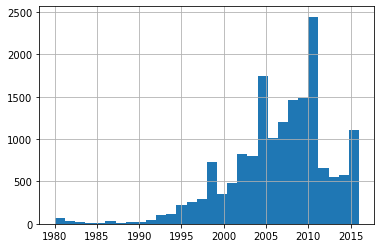

In [32]:
df_games_raw['release_year'].hist(bins=30)

И теперь могу дропнуть столбец year_in_name, он мне больше не нужен

In [33]:
df_games_raw.drop(['year_in_name'], axis='columns', inplace=True)

Пропуски с годами могли возникнуть из-за отсутствия точной даты релиза, но нам они нужны, поэтому я заполнили их на основе упоминания года в названии игр и группировке по платформам.

Теперь перейду к пропускам в других столбцах.

In [34]:
df_games_raw['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [35]:
df_games_raw['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце user_score помимо пропусков есть значение "tbd", которое выбивается из ряда оценок. Разберусь, что это такое.

In [36]:
df_games_raw.query('user_score == "tbd"')

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2003,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Если верить интернету, то tbd расшифровывается как "to be determinated", то есть будет определен позже, а пока не поределен, то есть то же что и NaN. Так его и заполню. А для удобоства сопоставления со столбоцом critic_score умножу ещё и на 10

In [37]:
df_games_raw.loc[df_games_raw['user_score'] == "tbd", 'user_score'] = 'nan'

In [38]:
df_games_raw['user_score'] = df_games_raw['user_score'].astype('Float64') * 10

Теперь приведу оба столбца с рейтингами к целочисленному формату, для удобства визуального восприятия и возможно небольшой экономии вычислительных затрат...

In [39]:
df_games_raw['user_score'] = df_games_raw['user_score'].astype('Int64')

In [40]:
df_games_raw['critic_score'] = df_games_raw['critic_score'].astype('Int64')

Заполнять пропуски в оценках я не буду, так как это не честно, пусть они останутся как неопределенные. Теперь посмотрю на пропуски в рейтинге.

In [41]:
df_games_raw['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заполню пропуски здесь по аналогии с пропусками в user_score, только наоборот, так как это вещественный формат и нам проще понять что пропуски - это неопределенный рейтинг. Здесь за неопределенный рейтинг отвечает аббревиатура RP. На нее и заменю.

In [42]:
df_games_raw.loc[df_games_raw['rating'].isna(), 'rating'] = 'RP'

In [43]:
df_games_raw['rating'].unique()

array(['E', 'RP', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC'], dtype=object)

Пропуски я обработал, остались только в оценках, которые образовались из-за того что либо по некоторым играм оценок вообще не поставили, либо у системы оценок есть какой-то минимальный порог, до которого она не выводит результат, либо в то время ещё не было возможности оценить игру. Заполнять мы их не будем, так как это исказит общую картину.

In [44]:
df_games_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name            16713 non-null object
platform        16713 non-null object
release_year    16713 non-null Int64
genre           16713 non-null object
na_sales        16713 non-null float64
eu_sales        16713 non-null float64
jp_sales        16713 non-null float64
other_sales     16713 non-null float64
critic_score    8137 non-null Int64
user_score      7590 non-null Int64
rating          16713 non-null object
dtypes: Int64(3), float64(4), object(4)
memory usage: 1.6+ MB


Посчитаю суммарные продажи во всех регионах и запишу их в отдельный столбец, который назову total_sales

In [45]:
df_games_raw['total_sales'] = (df_games_raw['na_sales'] 
                               + df_games_raw['eu_sales'] 
                               + df_games_raw['jp_sales'] 
                               + df_games_raw['other_sales'])

In [46]:
df_games_raw.head(3)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52


## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы. 

Распределение выпуска игр по годам я уже предварительно посмотрел. Изучу повнимательнее.

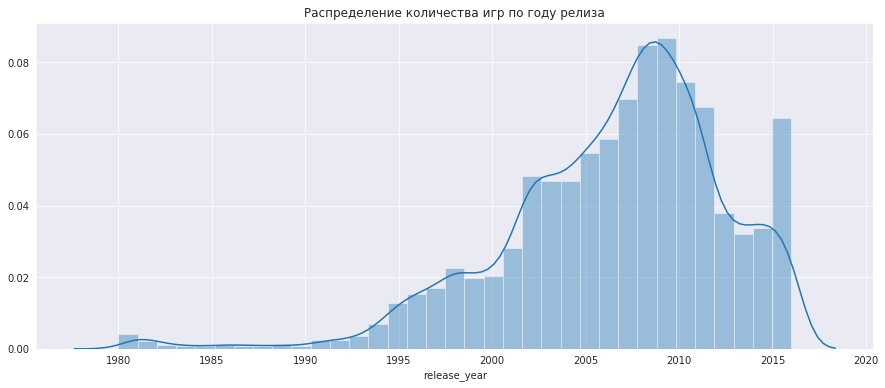

In [47]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 6));
sns.distplot(df_games_raw['release_year'], bins=35);
plt.title('Распределение количества игр по году релиза');

In [48]:
df_games_raw.groupby('platform')['release_year'].agg(['min', 'max', 'count']).sort_values(by = 'max')

,min,max,count
platform,,,
2600,1980,1989,133
GG,1992,1992,1
SCD,1993,1994,6
GEN,1990,1994,27
NES,1983,1994,98
3DO,1994,1995,3
TG16,1995,1995,2
NG,1993,1996,12
PCFX,1996,1996,1


Как мы видим, популярность игры начали набирать с приходом нового тысячилетия и пика по количеству игр достигли в 2010 г. Потом видимо количество перешло в качество или сказалс кризис. Если смотреть на таблицу, которую я отсортировал по последнему релизу игры для платформы, то можно заметить, что почти половина платформ осталась в 90-ых. Сейчас они не актуальны, а если смиотреть на распределение по годам, то не так уж и много игр выходило на них.

Посмотрим на выручку по платформам.

In [49]:
df_games_raw.groupby('platform')['total_sales'].agg(['sum', 'count']).sort_values(by = 'sum', ascending = False)

,sum,count
platform,,
PS2,1255.77,2161
X360,971.42,1262
PS3,939.65,1331
Wii,907.51,1320
DS,806.12,2151
PS,730.86,1197
GBA,317.85,822
PS4,314.14,392
PSP,294.05,1209


Выберем из этого списка ТОП-10 платформ по продажам:

In [50]:
top_10_platform = df_games_raw.groupby('platform')['total_sales'].agg(['sum', 'count']).sort_values(by = 'sum', ascending = False).index[:10].tolist()

In [51]:
top_10_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

И постороим для них распределение по годам:

In [52]:
df_games_raw[df_games_raw['platform'].isin(top_10_platform)]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,85,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,66,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,RP,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,RP,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,RP,0.01


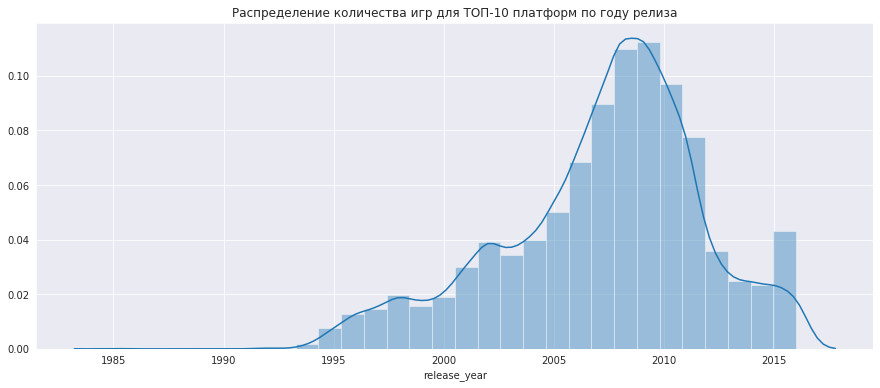

In [53]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 6));
sns.distplot(df_games_raw.loc[df_games_raw['platform'].isin(top_10_platform), 'release_year'], bins=30);
plt.title('Распределение количества игр для ТОП-10 платформ по году релиза');

Посмотрю, как долго в среднем существуют платформы из ТОП-10 

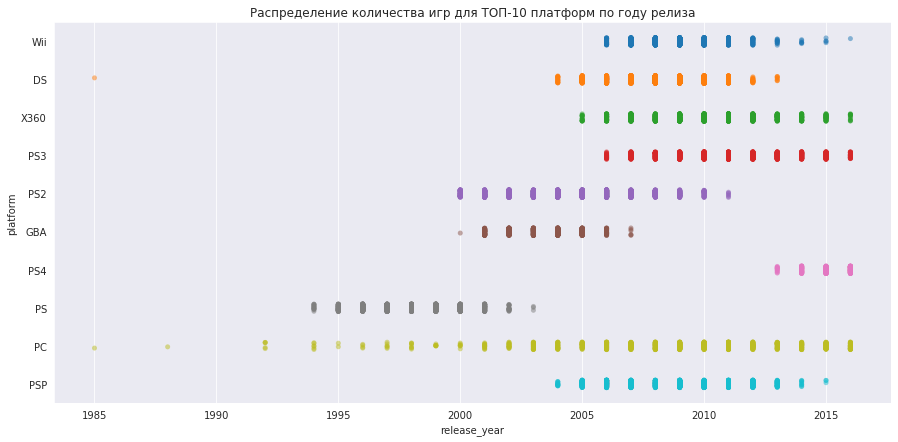

In [54]:
plt.figure(figsize=(15, 7));
sns.stripplot(data=df_games_raw[df_games_raw['platform'].isin(top_10_platform)],
              x='release_year',
              y='platform',
              alpha=.5);
plt.title('Распределение количества игр для ТОП-10 платформ по году релиза');

В среднем платформы актуальны около 10 лет. Поэтому для прогноза на 2017 я бы взял срез с 2004 года.

In [55]:
df_games = df_games_raw.query('release_year >= 2005').copy()

In [56]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11437 entries, 0 to 16714
Data columns (total 12 columns):
name            11437 non-null object
platform        11437 non-null object
release_year    11437 non-null Int64
genre           11437 non-null object
na_sales        11437 non-null float64
eu_sales        11437 non-null float64
jp_sales        11437 non-null float64
other_sales     11437 non-null float64
critic_score    5736 non-null Int64
user_score      5615 non-null Int64
rating          11437 non-null object
total_sales     11437 non-null float64
dtypes: Int64(3), float64(5), object(4)
memory usage: 1.2+ MB


In [57]:
df_games

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,85,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,66,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,RP,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01


### Потенциально прибыльные платформы

Посмотрю на поведение платформ по продажам (какие растут, какие падают), чтобы определить потенциально прибыльные платформы на 2017 год.

In [60]:
df_games_pivot = df_games.pivot_table(index=['platform', 'release_year'], values='total_sales', aggfunc='sum').reset_index()

In [61]:
df_games_pivot

,platform,release_year,total_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,57.76
3,3DS,2014,43.76
4,3DS,2015,27.78
...,...,...,...
105,XB,2008,0.18
106,XOne,2013,18.96
107,XOne,2014,54.07
108,XOne,2015,60.14


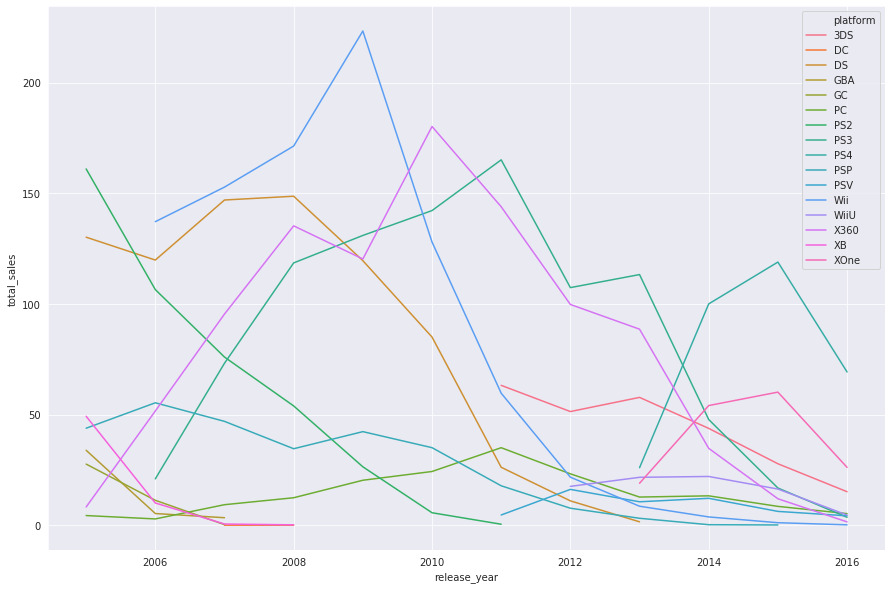

In [62]:
sns.set_style('darkgrid');
plt.figure(figsize=(15, 10));
sns.lineplot(data=df_games_pivot, x="release_year", y="total_sales", hue="platform");

На графике сложно сориентироваться, платформ слишком много и часть из них не вылезают за пределы 50 млн прибыли в год. Построю тот же график для платформ, которые выходили за пределы 50 млн за послдение 5 лет

In [63]:
top_platform = df_games_pivot.query('(total_sales > 50) and (release_year >= 2012)')['platform'].unique().tolist()
top_platform

['3DS', 'PS3', 'PS4', 'X360', 'XOne']

Добавлю сюда еще PC, так как считаю не правильным списывать его со счетов.

In [64]:
top_platform.append('PC')
top_platform

['3DS', 'PS3', 'PS4', 'X360', 'XOne', 'PC']

In [65]:
df_games_pivot_top_new = df_games[df_games['platform'].isin(top_platform)].pivot_table(index=['platform', 'release_year'], values='total_sales', aggfunc='sum').reset_index()
df_games_pivot_top_new

,platform,release_year,total_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,57.76
3,3DS,2014,43.76
4,3DS,2015,27.78
5,3DS,2016,15.14
6,PC,2005,4.37
7,PC,2006,2.85
8,PC,2007,9.28
9,PC,2008,12.42


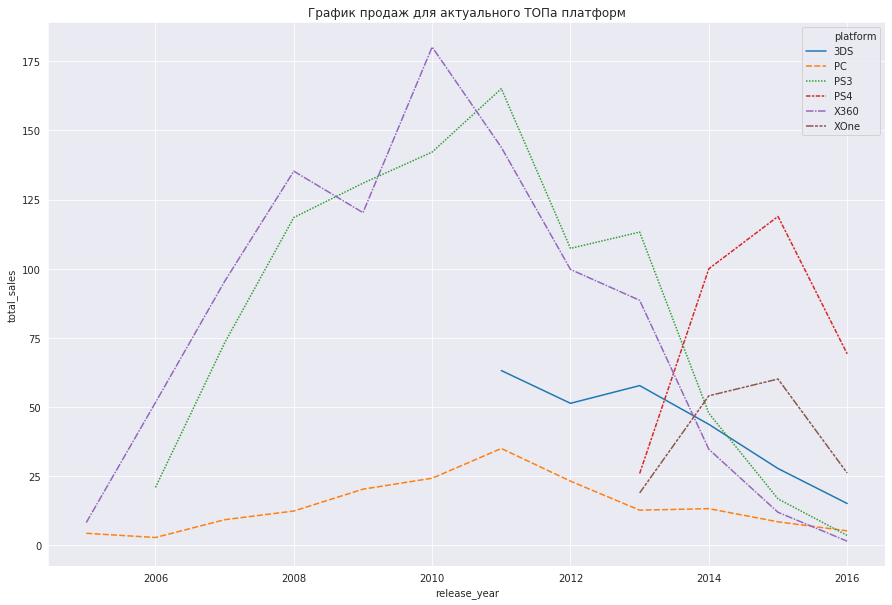

In [66]:
sns.set_style('darkgrid');
plt.figure(figsize=(15, 10));
sns.lineplot(data=df_games_pivot_top_new, x="release_year", y="total_sales", hue = "platform", style="platform");
plt.title('График продаж для актуального ТОПа платформ');

Общий упадок к 2016 году образовался из-за неполноты данных за 2016 год. Учитывая это, как самые перспективные я бы выбрал платформы PS4 и XOne, как самую стабилльную PC и выделил бы еще 3DS, X360, Wii и PS3 как самые хайповые, на которые тоже стоит обращать внимание.

### Глобальные продажи игр в разбивке по платформам

In [67]:
df_games_top_new = df_games[df_games['platform'].isin(top_platform)]
df_games_top_new

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,63,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,82,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,81,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,34,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
...,...,...,...,...,...,...,...,...,...,...,...,...
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61,58,T,0.01
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60,72,E10+,0.01
16705,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.00,63,58,RP,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01


In [68]:
top_platform

['3DS', 'PS3', 'PS4', 'X360', 'XOne', 'PC']

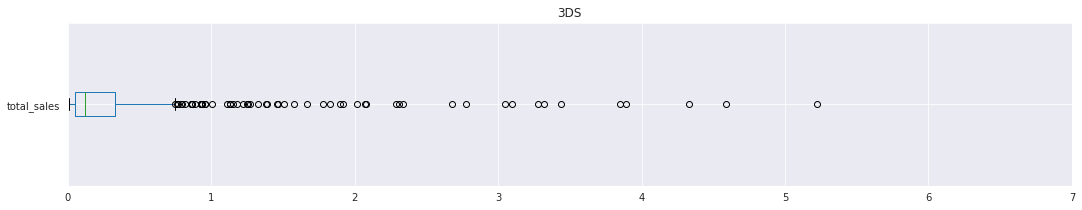

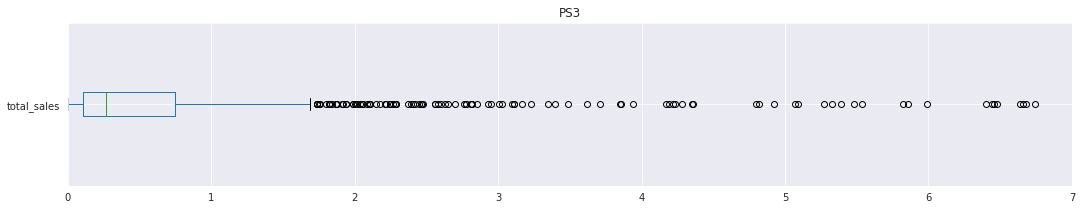

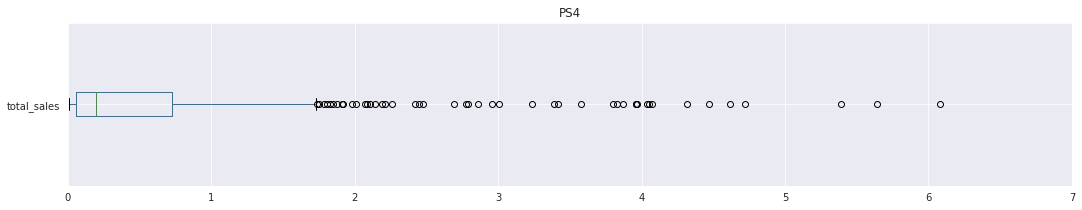

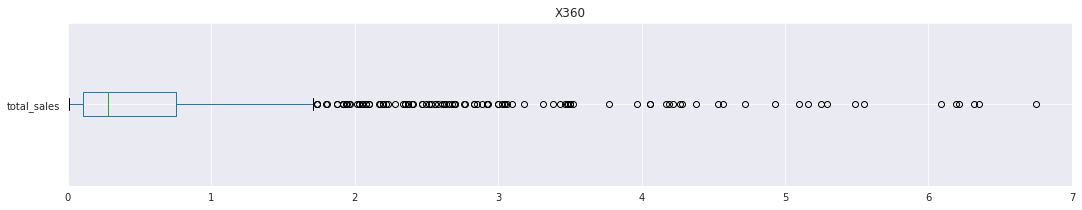

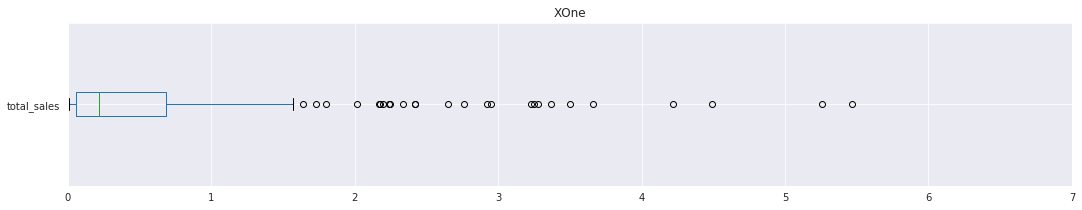

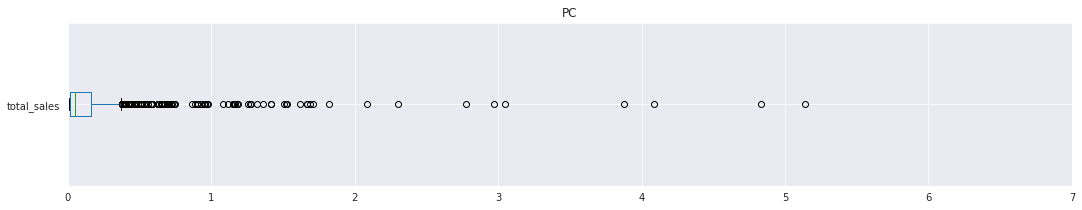

In [70]:
for n in range(0, 6):
    df_games_top_new[df_games_top_new['platform'] == top_platform[n]].boxplot(column='total_sales', figsize=(18, 3), vert=False);
    plt.xlim(0, 7)
    plt.title(top_platform[n]);
    plt.show()

Из-за разных протяженностей не удобно сравнивать, зато видно у кого какой хвост. Оставлю эти боксплоты и выведу приведенные, для удобства сравнения

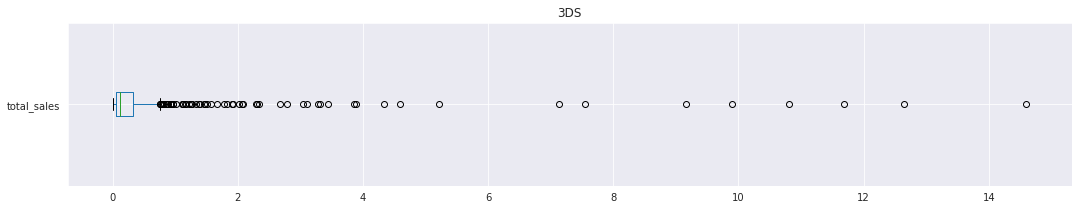

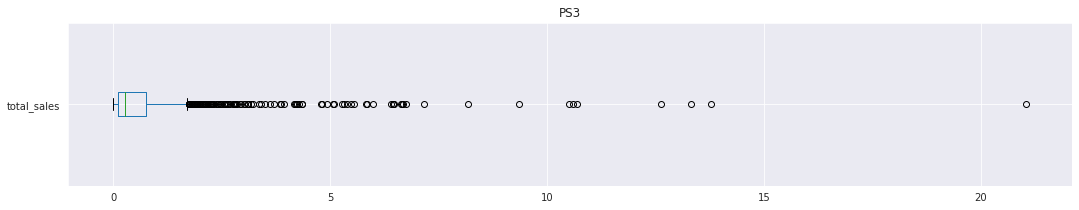

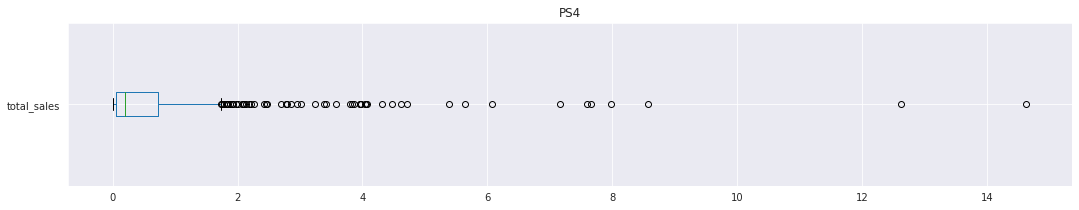

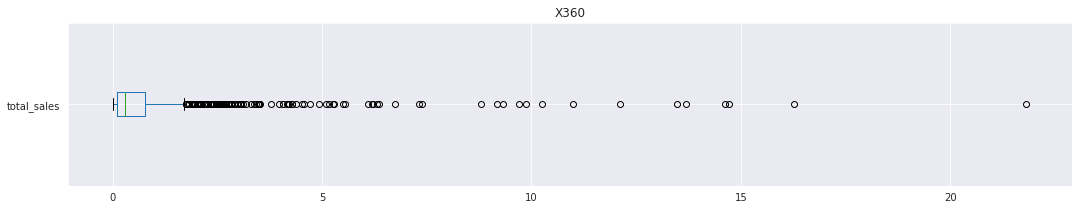

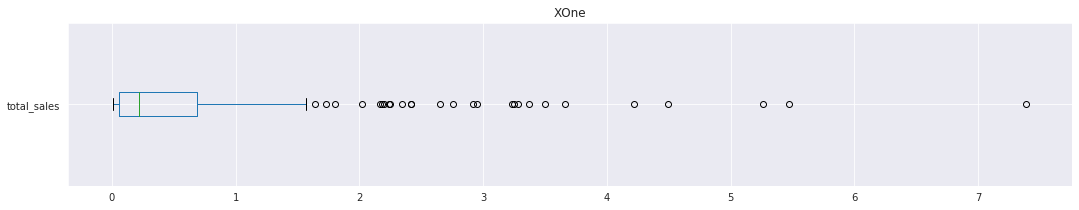

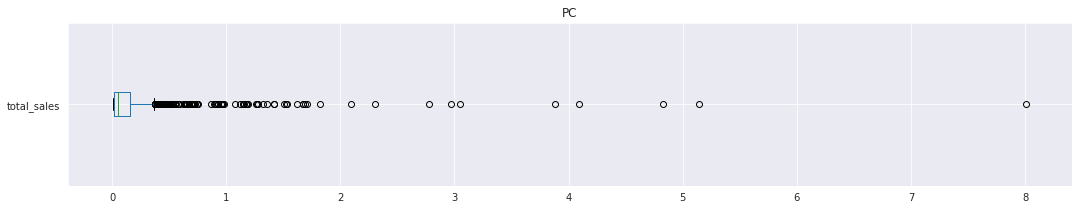

In [71]:
for n in range(0, 6):
    df_games_top_new[df_games_top_new['platform'] == top_platform[n]].boxplot(column='total_sales', figsize=(18, 3), vert=False);
    plt.title(top_platform[n]);
    plt.show()

In [72]:
df_games_top_new[df_games_top_new['platform'] == '3DS']['total_sales'].describe()

count    520.000000
mean       0.498077
std        1.430876
min        0.010000
25%        0.050000
50%        0.120000
75%        0.330000
max       14.600000
Name: total_sales, dtype: float64

In [73]:
df_games_top_new[df_games_top_new['platform'] == 'PS3']['total_sales'].describe()

count    1331.000000
mean        0.705973
std         1.391749
min         0.000000
25%         0.110000
50%         0.270000
75%         0.750000
max        21.050000
Name: total_sales, dtype: float64

In [74]:
df_games_top_new[df_games_top_new['platform'] == 'PS4']['total_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

In [75]:
df_games_top_new[df_games_top_new['platform'] == 'X360']['total_sales'].describe()

count    1262.000000
mean        0.769746
std         1.615674
min         0.010000
25%         0.110000
50%         0.280000
75%         0.757500
max        21.820000
Name: total_sales, dtype: float64

In [76]:
df_games_top_new[df_games_top_new['platform'] == 'XOne']['total_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

In [77]:
df_games_top_new[df_games_top_new['platform'] == 'PC']['total_sales'].describe()

count    830.000000
mean       0.206687
std        0.531399
min        0.010000
25%        0.020000
50%        0.050000
75%        0.160000
max        8.010000
Name: total_sales, dtype: float64

Анализ глобальных продаж в разбивке по платформам показывает мне, что штучно самые высокоприбыльные игры попадаются на платформах PS3, X360. Не так сильно отстают от них 3DS и PS4, остальные же имеют показатели пониже. Однако эти показатели находятся за границами усов и являются выбросами из общей выборки. 
Более наглядно видно на приведенных боксплотах. В среднем уже у нас 3 уверенных лидера PS3, PS4 и X360 и рядом с ними XOne. Медиальное значение выше у X360, поэтому его бы я вывел как абсолютного лидера.   
В среднем для топовых платформ годовые продажи на игру составляют порядка 0,25 млн проданных копий и редко выходят за 0,75 млн проданных копий в год.

### Влияние на продажи отзывов пользователей и критиков для X360.

In [78]:
df_games_top_new.groupby('platform').count()

,name,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
platform,,,,,,,,,,,
3DS,520,520,520,520,520,520,520,168,174,520,520
PC,830,830,830,830,830,830,830,619,659,830,830
PS3,1331,1331,1331,1331,1331,1331,1331,820,877,1331,1331
PS4,392,392,392,392,392,392,392,252,257,392,392
X360,1262,1262,1262,1262,1262,1262,1262,916,966,1262,1262
XOne,247,247,247,247,247,247,247,169,182,247,247


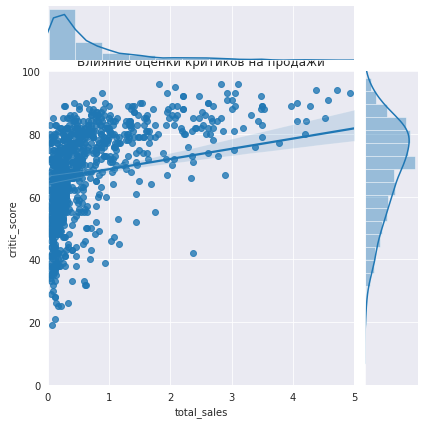

In [79]:
sns.jointplot(data=df_games_top_new[df_games_top_new['platform'] == 'X360'], x='total_sales', y='critic_score',
              xlim=(0, 5),
              ylim=(0, 100),
              kind='reg');
plt.title('Влияние оценки критиков на продажи'); #как расположить над графиком?

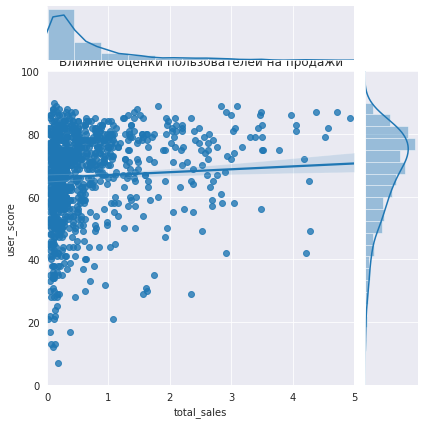

In [80]:
sns.jointplot(data=df_games_top_new[df_games_top_new['platform'] == 'X360'], x='total_sales', y='user_score',
              xlim=(0, 5),
              ylim=(0, 100),
              kind='reg');
plt.title('Влияние оценки пользователей на продажи');

In [84]:
df_games_top_new.query('platform == "PS3"').corr()

,release_year,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
release_year,1.000000,-0.146175,-0.068319,0.049341,-0.085995,-0.003995,-0.123147,-0.099310
na_sales,-0.146175,1.000000,0.812589,0.341841,0.872146,0.454512,0.137144,0.936717
eu_sales,-0.068319,0.812589,1.000000,0.371473,0.974316,0.380806,0.084722,0.957884
jp_sales,0.049341,0.341841,0.371473,1.000000,0.375885,0.204089,0.170002,0.456083
other_sales,-0.085995,0.872146,0.974316,0.375885,1.000000,0.395003,0.110032,0.976455
critic_score,-0.003995,0.454512,0.380806,0.204089,0.395003,1.000000,0.629005,0.432432
user_score,-0.123147,0.137144,0.084722,0.170002,0.110032,0.629005,1.000000,0.126691
total_sales,-0.099310,0.936717,0.957884,0.456083,0.976455,0.432432,0.126691,1.000000


Корреляция равна 0.432432 для критиков и 0.126691 для пользовательских оценок

По графикам и показателям корреляции вижу, что мнение критиков сказывается на продажах, что не скажешь по поводу оценок пользователей. Практически все топовые по продажам игры имеют рейтинг более 80, однако и большое количество высокооценных критиками игр не принесли такого коммерческого успеха.

### Распределение игр по жанрам

In [85]:
df_games_top_new.groupby('genre')['total_sales'].agg(['min', 'max', 'median', 'mean', 'sum', 'count']).sort_values(by = 'sum', ascending=False)

,min,max,median,mean,sum,count
genre,,,,,,
Action,0.01,21.05,0.210,0.595455,759.80,1276
Shooter,0.01,14.73,0.355,1.137003,652.64,574
Sports,0.00,8.58,0.260,0.632209,369.21,584
Role-Playing,0.01,14.60,0.200,0.699385,307.03,439
Racing,0.01,12.65,0.190,0.590797,177.83,301
Misc,0.01,21.82,0.160,0.455425,166.23,365
Fighting,0.01,7.55,0.330,0.596541,110.36,185
Simulation,0.01,9.17,0.120,0.402452,83.71,208
Platform,0.01,10.81,0.240,0.706581,82.67,117


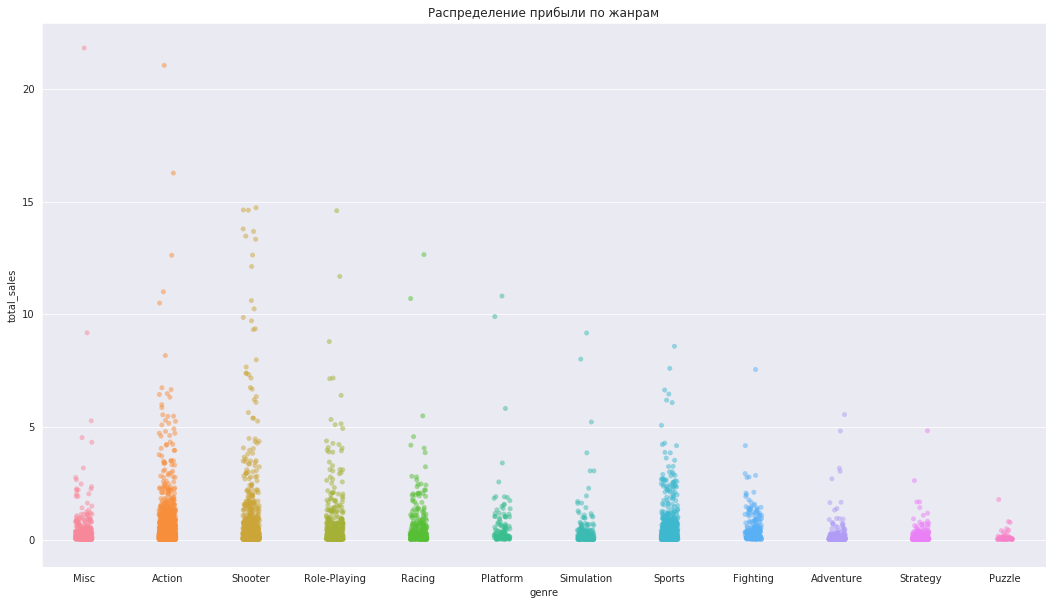

In [86]:
sns.set_style('darkgrid')
plt.figure(figsize=(18, 10));
sns.stripplot(data=df_games_top_new,
              x='genre',
              y='total_sales',
              dodge=True,
              alpha=.5,
              hue=None);
plt.title('Распределение прибыли по жанрам');

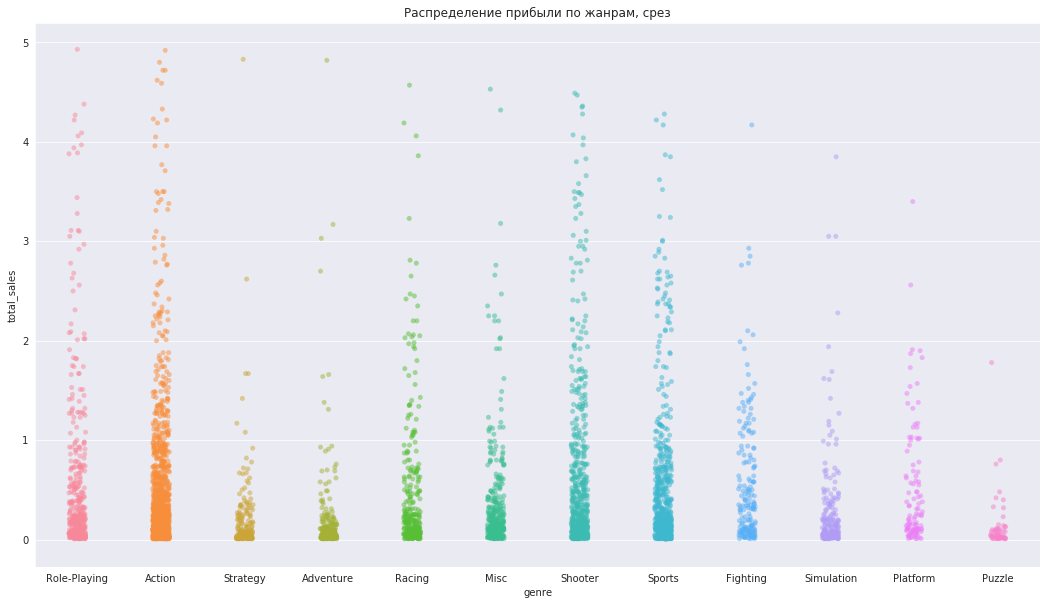

In [87]:
sns.set_style('darkgrid')
plt.figure(figsize=(18, 10));
sns.stripplot(data=df_games_top_new.query('total_sales < 5'),
              x='genre',
              y='total_sales',
              dodge=True,
              alpha=.5,
              hue=None);
plt.title('Распределение прибыли по жанрам, срез');

В жанрах по количеству и суммарной прибыли лидирует Action, за ним идет Shooter и Sports. Самый высокоприбыльной игрой может похвастаться Misc. Если же смотреть на медианное и среднее значения по прибыли, здесь в лидерах однозначно Shooter. Визуально по графикам я бы выделил как самые популярные и прибыльные жанры: Action, Shooter и Sports, но также обратил внимание на Role-Playing и Racing - у них хорошая плотность в высокоприбыльных играх.

## Портрет пользователя по регионам

### Платформы

In [88]:
df_games.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].agg(['sum', 'count']).sort_values(by = ('na_sales', 'sum'), ascending=False)

na_sales       eu_sales       jp_sales      
              sum count      sum count      sum count
platform                                             
X360       602.47  1262   270.76  1262    12.43  1262
Wii        496.90  1320   262.21  1320    69.33  1320
PS3        393.49  1331   330.29  1331    80.19  1331
DS         374.07  2127   184.96  2127   171.90  2127
PS2        202.22  1068    88.28  1068    51.02  1068
PS4        108.74   392   141.09   392    15.96   392
PSP        106.92  1194    64.98  1194    74.75  1194
XOne        93.12   247    51.59   247     0.34   247
3DS         83.49   520    61.48   520   100.67   520
PC          47.03   830   105.08   830     0.00   830
XB          42.96   246    14.93   246     0.02   246
WiiU        38.10   147    25.13   147    13.01   147
GC          27.97   141     7.47   141     2.78   141
GBA         26.85   180    10.19   180     4.78   180
PSV         12.58   430    13.12   430    21.91   430
DC           0.00     2     0.00     2     0.06     2

In [89]:
TOP_5_platform_NA = df_games.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].agg(['sum', 'count']).sort_values(by = ('na_sales', 'sum'), ascending=False).index[:5].tolist()
TOP_5_platform_NA

['X360', 'Wii', 'PS3', 'DS', 'PS2']

In [90]:
TOP_5_platform_EU = df_games.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].agg(['sum', 'count']).sort_values(by = ('eu_sales', 'sum'), ascending=False).index[:5].tolist()
TOP_5_platform_EU

['PS3', 'X360', 'Wii', 'DS', 'PS4']

In [91]:
TOP_5_platform_JP = df_games.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].agg(['sum', 'count']).sort_values(by = ('jp_sales', 'sum'), ascending=False).index[:5].tolist()
TOP_5_platform_JP

['DS', '3DS', 'PS3', 'PSP', 'Wii']

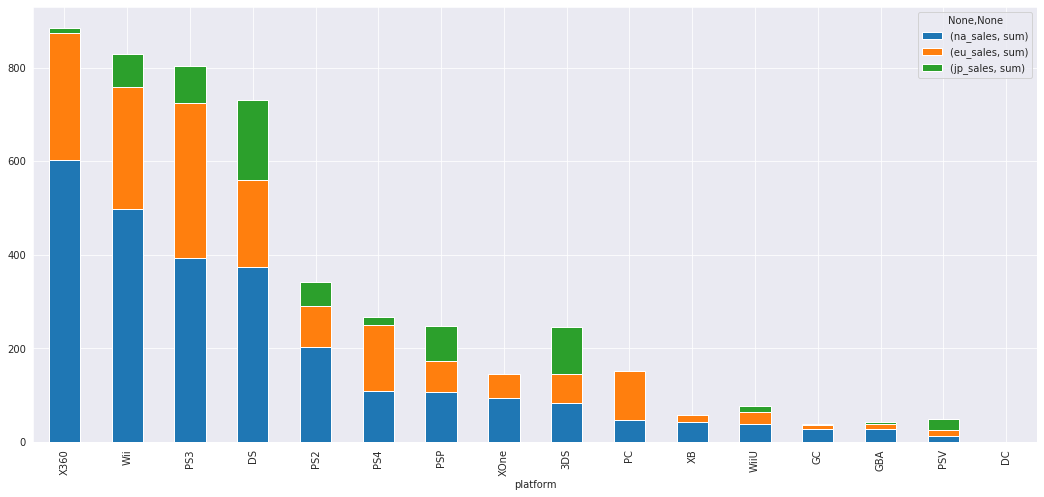

In [92]:
df_games.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'
                            ].agg(['sum']).sort_values(by = ('na_sales', 'sum'), ascending=False).plot(kind='bar', stacked=True, figsize=(18, 8));

### Жанры

In [93]:
df_games.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].agg(['sum', 'count']).sort_values(by = ('na_sales', 'sum'), ascending=False)

na_sales       eu_sales       jp_sales      
                  sum count      sum count      sum count
genre                                                    
Action         589.68  2612   378.86  2612   109.32  2612
Sports         437.09  1406   266.90  1406    52.90  1406
Shooter        403.91   848   250.27   848    20.75   848
Misc           317.17  1391   168.49  1391    73.58  1391
Role-Playing   212.23  1077   115.69  1077   180.06  1077
Racing         164.21   651   130.14   651    17.65   651
Platform       149.83   427    87.41   427    36.32   427
Simulation     128.28   659    86.04   659    32.49   659
Fighting       106.38   460    48.16   460    31.68   460
Adventure       66.86  1071    39.95  1071    30.29  1071
Puzzle          49.59   404    33.90   404    18.64   404
Strategy        31.68   431    25.75   431    15.47   431

In [94]:
TOP_5_genre_NA = df_games.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].agg(['sum', 'count']).sort_values(by = ('na_sales', 'sum'), ascending=False).index[:5].tolist()
TOP_5_genre_NA

['Action', 'Sports', 'Shooter', 'Misc', 'Role-Playing']

In [95]:
TOP_5_genre_EU = df_games.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].agg(['sum', 'count']).sort_values(by = ('eu_sales', 'sum'), ascending=False).index[:5].tolist()
TOP_5_genre_EU

['Action', 'Sports', 'Shooter', 'Misc', 'Racing']

In [96]:
TOP_5_genre_JP = df_games.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].agg(['sum', 'count']).sort_values(by = ('jp_sales', 'sum'), ascending=False).index[:5].tolist()
TOP_5_genre_JP

['Role-Playing', 'Action', 'Misc', 'Sports', 'Platform']

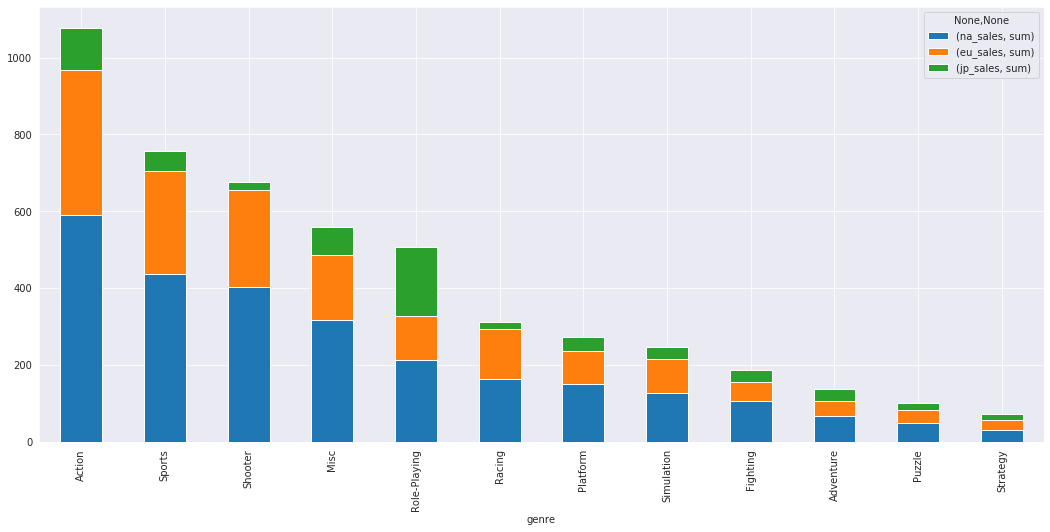

In [97]:
df_games.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'
                            ].agg(['sum']).sort_values(by = ('na_sales', 'sum'), ascending=False).plot(kind='bar', stacked=True, figsize=(18, 8));

Если смотреть на распределения в разрезе регионов Северной Америки, Европы и Японии, то я вижу следующую картину.  
Северная Америка сильно опережает рынок Европы и Японии по объему. Европа в целом по вкусам не сильно отличается от Америки, что не скажешь про Японию - у неё свой взгляд на вещи как в платформах, так и в жанрах. Среди топовых платформ за все время для Америки и Европы в ТОП-3 входят X360, Wii и PS3, не сильно отстала от них DS. Для европы на первом месте правда стоит PS3, а не X360.   
Для Японии этот ТОП выгляди как DS и 3DS как безоговорочные лидеры, а за ними уже делят место на троих Wii, PS3 и PSP.
По жанрам для Америки и Европы лидирует Action и за ним Sports и Shooter не сильно отличаются друг от друга. В принципе все кажется логичным. Япония, более далекая от моего понимания имеет в лидерах с отрывом жанр Role-Playing и уже только потом Action, Misc и Sports.
ТОП-5 для каждого региона по платформам и жанрам я вывел выше, графики распределения в принципе наглядно отображают ситуацию.  
Здесь картина немного отличается от той, что мы использовали для анализа перспектиной платформы, так как мы берем данные за весь имеющийся период.

### Рейтинг ESRB в Европе

In [98]:
df_games.groupby('rating')['eu_sales'].agg(['sum', 'count', 'median', 'mean']).sort_values(by = 'sum', ascending=False)#.plot(kind='bar', stacked=True, figsize=(18, 8));

,sum,count,median,mean
rating,,,,
E,509.39,2710,0.02,0.187967
M,417.12,1253,0.10,0.332897
T,261.92,2045,0.03,0.128078
RP,255.37,4015,0.00,0.063604
E10+,187.04,1405,0.03,0.133125
AO,0.61,1,0.61,0.610000
EC,0.11,8,0.00,0.013750


Рейтинги AO и EC исключим, так как по ним слишком мало представителей.

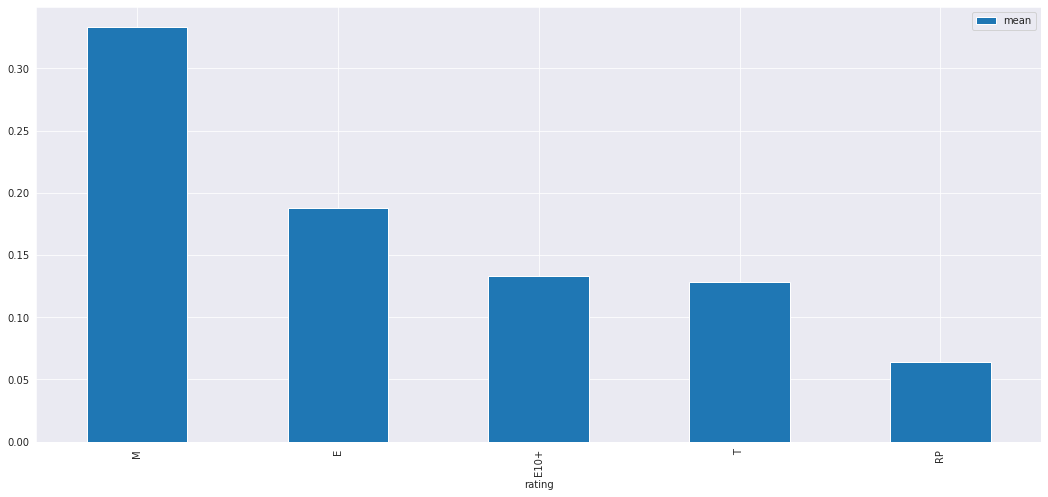

In [99]:
df_games.query('rating!=["AO","EC"]').groupby('rating')['eu_sales'].agg(['mean']).sort_values(by = 'mean', ascending=False).plot(kind='bar', stacked=True, figsize=(18, 8));

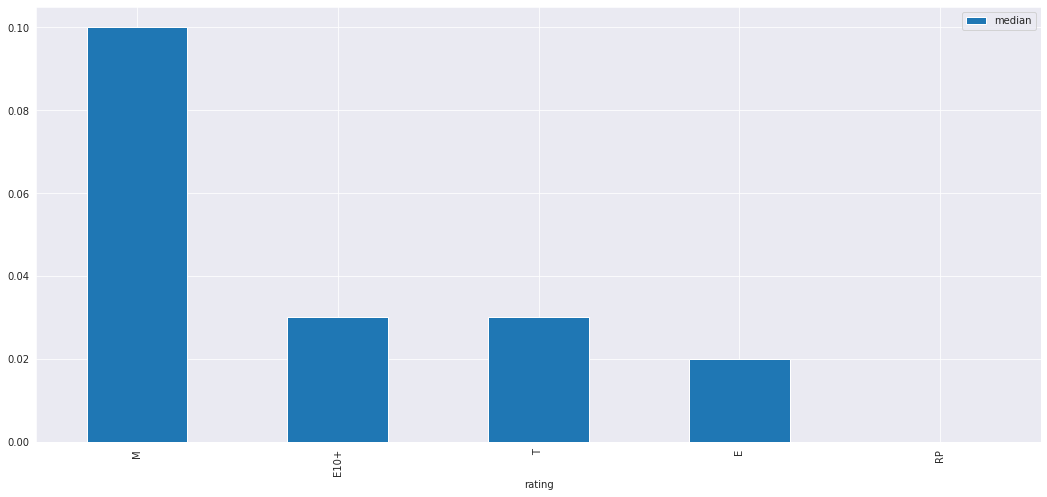

In [100]:
df_games.query('rating!=["AO","EC"]').groupby('rating')['eu_sales'].agg(['median']).sort_values(by = 'median', ascending=False).plot(kind='bar', stacked=True, figsize=(18, 8));

Взяв срез по рейтенгу ESRB в Европе можно сказать, что по продажам лидирует рейтинг M, остальные примерно на одном уровне.

## Проверка гипотез

### Гипотеза 1
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Для того чтобы сравнить выручку пользователей по тарифу нам НЕ достаточно просто сравнить средние показатели.

In [101]:
df_games.loc[df_games['platform'] == 'XOne', 'user_score'].mean() - df_games.loc[df_games['platform'] == 'PC', 'user_score'].mean()

-3.6354866681118665

Для того, чтобы считать это расхождение случайным или не случайным, мы воспользуемся гипотезой о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2, equal_var). Это статисттически тест используемый с распределением Стьюдента (Уильяма Госсета) для сравнения равенства двух генеральных совокупностей.   
Наша нулевая гипотеза, которую мы проверям будем звучать как:  
"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"  
Альтернативная гипотеза:  
"Средние пользовательские рейтинги платформ Xbox One и PC разные"

Критический уровень статистической значимости зададим равный 0,05

In [102]:
alpha = 0.05

Для корректного определения параметра equal_var нашей функции st.ttest_ind нам нужно сравнить дисперсии наших распределений. Воспользуемся для этого тестом Левена

In [103]:
df_PC_user_score = df_games.loc[df_games['platform'] == 'PC', 'user_score'].dropna()

In [104]:
df_XOne_user_score = df_games.loc[df_games['platform'] == 'XOne', 'user_score'].dropna()

In [105]:
df_games.loc[df_games['platform'] == 'XOne', 'user_score'].describe()

count    182.000000
mean      65.214286
std       13.809406
min       16.000000
25%       58.000000
50%       68.000000
75%       75.000000
max       92.000000
Name: user_score, dtype: float64

In [106]:
df_games.loc[df_games['platform'] == 'PC', 'user_score'].describe()

count    659.000000
mean      68.849772
std       15.126625
min       14.000000
25%       60.000000
50%       73.000000
75%       80.000000
max       93.000000
Name: user_score, dtype: float64

In [108]:
#Дисперсии отличаются больше чем на 5% поэтому параметр equal_var зададим False

In [109]:
scipy.stats.levene(df_PC_user_score, df_XOne_user_score)

LeveneResult(statistic=1.4546019885038106, pvalue=0.2281309499561957)

Тест Левена имеет показатель pvalue больше, чем 0,05, следовательно можем считать дисперсии однородными и параметр equal_var в нашем тесте зададим True

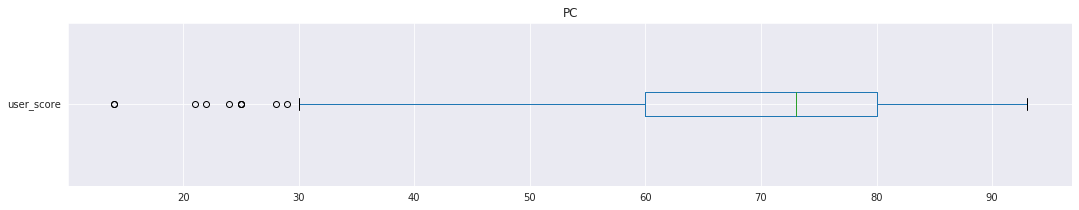

In [110]:
df_games[df_games['platform'] == 'PC'].boxplot(column='user_score', figsize=(18, 3), vert=False);
plt.title('PC');

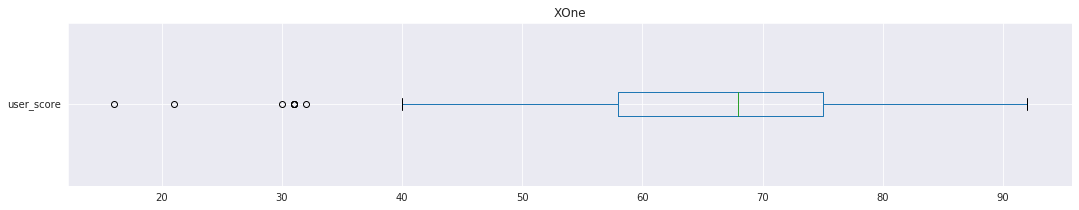

In [111]:
df_games[df_games['platform'] == 'XOne'].boxplot(column='user_score', figsize=(18, 3), vert=False);
plt.title('XOne');

In [112]:
results1 = st.ttest_ind(df_PC_user_score, df_XOne_user_score, equal_var = True)

results1.pvalue

0.0035584893866422093

In [113]:
results1.pvalue > alpha

False

Вероятность наступления нашей нулевой гипотезы слишком мала, поэтому мы не можем её принять и считаем, что:  
**Средние пользовательские рейтинги платформ Xbox One и PC разные**  
И как мы видим из описания и графиков, средние рейтинги по платформе PC выше

### Гипотеза 2
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Проделаем тот же алгоритм для проверки гипотезу различия пользовательских рейтингов для двух жанров.  
Наша нулевая гипотеза, которую мы проверям будем звучать как: 
"Средние пользовательские рейтинги жанров Action и Sports одинаковые"  
Альтернативная гипотеза:  
"Средние пользовательские рейтинги жанров Action и Sports разные"

In [114]:
df_Action_user_score = df_games.loc[df_games['genre'] == 'Action', 'user_score'].dropna()

In [115]:
df_Sports_user_score = df_games.loc[df_games['genre'] == 'Sports', 'user_score'].dropna()

In [116]:
df_Action_user_score.describe()

count    1488.000000
mean       69.467070
std        13.640262
min         3.000000
25%        63.000000
50%        72.000000
75%        79.000000
max        95.000000
Name: user_score, dtype: float64

In [117]:
df_Sports_user_score.describe()

count    768.000000
mean      65.470052
std       16.355460
min        2.000000
25%       56.750000
50%       69.000000
75%       78.000000
max       93.000000
Name: user_score, dtype: float64

In [118]:
scipy.stats.shapiro(df_Action_user_score)

(0.93326735496521, 2.879040811279479e-25)

In [119]:
scipy.stats.shapiro(df_Sports_user_score)

(0.9349104762077332, 8.638262026142294e-18)

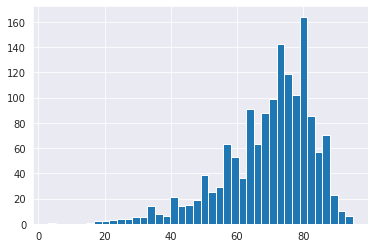

In [120]:
df_Action_user_score.hist(bins=40)

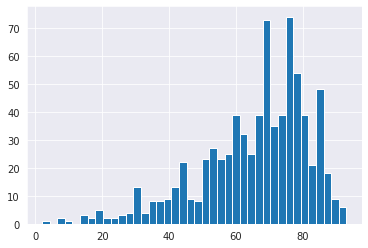

In [121]:
df_Sports_user_score.hist(bins=40)

In [123]:
scipy.stats.levene(df_Action_user_score, df_Sports_user_score)

LeveneResult(statistic=25.145323879465064, pvalue=5.731372141369575e-07)

In [124]:
scipy.stats.levene(df_Action_user_score, df_Sports_user_score).pvalue > alpha

False

In [125]:
results2 = st.ttest_ind(df_Action_user_score, df_Sports_user_score, equal_var = False)

results2.pvalue

7.828480301896249e-09

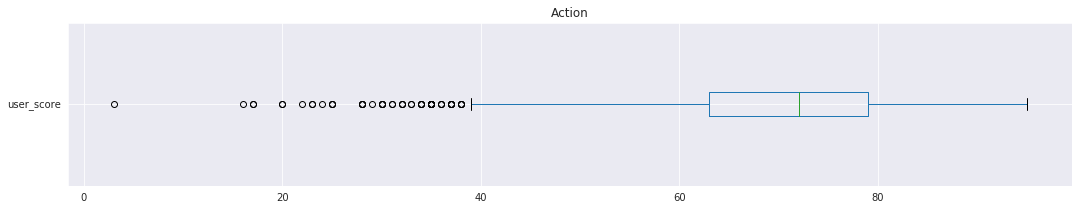

In [126]:
df_games[df_games['genre'] == 'Action'].boxplot(column='user_score', figsize=(18, 3), vert=False);
plt.title('Action');

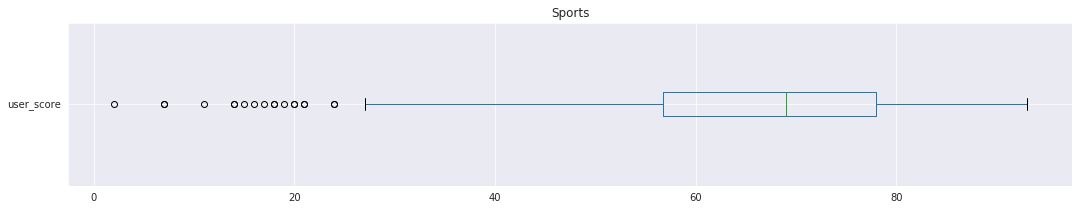

In [127]:
df_games[df_games['genre'] == 'Sports'].boxplot(column='user_score', figsize=(18, 3), vert=False);
plt.title('Sports');

In [128]:
results2.pvalue > alpha

False

Несмотря на кажущуюся схожесть средних показателей, вероятность наступления нашей нулевой гипотезы слишком мала, поэтому мы не можем её принять и считаем, что:  
**Средние пользовательские рейтинги жанров Action и Sports разные**
И уже как мы видим из описания и графиков, средние рейтинги по жанру Action выше

## Проверка гипотез попытка 2

### Гипотеза 1 попытка 2
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Наша нулевая гипотеза, которую мы проверям будем звучать как:  
"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"  
Альтернативная гипотеза:  
"Средние пользовательские рейтинги платформ Xbox One и PC разные"

Критический уровень статистической значимости зададим равный 0,05

In [129]:
alpha = 0.05

Для корректного определения параметра equal_var нашей функции st.ttest_ind нам нужно сравнить дисперсии наших распределений. Воспользуемся для этого тестом Левена

In [130]:
df_PC_user_score = df_games.loc[df_games['platform'] == 'PC', 'user_score'].dropna()

In [131]:
df_XOne_user_score = df_games.loc[df_games['platform'] == 'XOne', 'user_score'].dropna()

In [132]:
df_games.loc[df_games['platform'] == 'XOne', 'user_score'].describe()

count    182.000000
mean      65.214286
std       13.809406
min       16.000000
25%       58.000000
50%       68.000000
75%       75.000000
max       92.000000
Name: user_score, dtype: float64

In [133]:
df_games.loc[df_games['platform'] == 'PC', 'user_score'].describe()

count    659.000000
mean      68.849772
std       15.126625
min       14.000000
25%       60.000000
50%       73.000000
75%       80.000000
max       93.000000
Name: user_score, dtype: float64

Для начала проверим наши данные на нормальность, чтобы решить какой метод сравнения средних нам применить. Посмотрим на гистограмму распределения и применим метода Шапиро-Уилка для статистической проверки на нормальность.

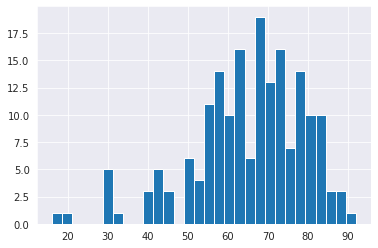

In [134]:
df_games.loc[df_games['platform'] == 'XOne', 'user_score'].hist(bins=30)

In [135]:
scipy.stats.shapiro(df_XOne_user_score)

(0.9550556540489197, 1.524987328593852e-05)

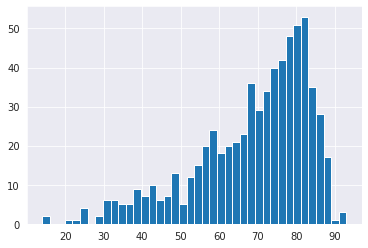

In [136]:
df_games.loc[df_games['platform'] == 'PC', 'user_score'].hist(bins=40)

In [137]:
scipy.stats.shapiro(df_PC_user_score)

(0.914787232875824, 8.723217197364246e-19)

Общая картина распределения оценок и низкие показатели p-value теста Шапиро-Уилка (гораздо меньше 0,05) говорят нам о том, что распределения у нас не нормальные, поэтому для проверки гипотез нам надо применить тест Манна-Уитни. Параметр alternative зададим two-sided, так как нас интересует отклонение в обе стороны.

In [138]:
scipy.stats.mannwhitneyu(df_PC_user_score, df_XOne_user_score, use_continuity=True, alternative='two-sided')

MannwhitneyuResult(statistic=71570.0, pvalue=6.328902686097226e-05)

In [139]:
scipy.stats.mannwhitneyu(df_PC_user_score, df_XOne_user_score, use_continuity=True, alternative='two-sided').pvalue > alpha

False

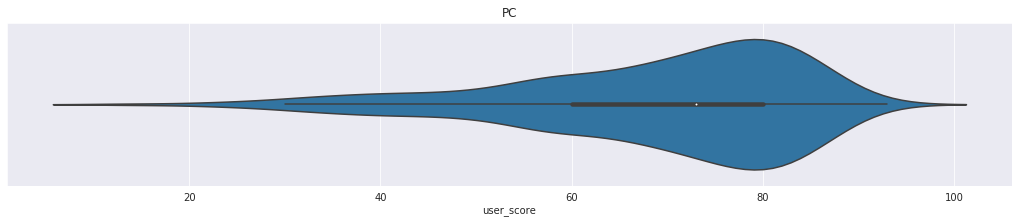

In [140]:
df_PC_user_score = df_PC_user_score.astype('float64')
sns.set_style('darkgrid')
plt.figure(figsize=(18, 3));
sns.violinplot(df_PC_user_score);
plt.title('PC');

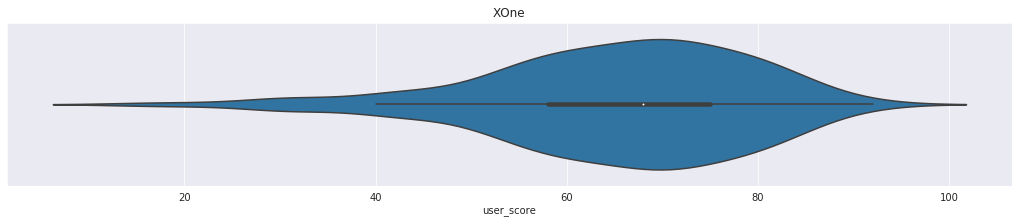

In [141]:
df_XOne_user_score = df_XOne_user_score.astype('float64')
sns.set_style('darkgrid')
plt.figure(figsize=(18, 3));
sns.violinplot(df_XOne_user_score);
plt.title('XOne');

Тест Манна-Уитни показывает нам, что вероятность наступления нашей нулевой гипотезы слишком мала, поэтому мы не можем её принять и считаем, что:  
**Средние пользовательские рейтинги платформ Xbox One и PC разные**  
И как мы видим из описания и графиков, средние рейтинги по платформе PC выше

Вывод у нас не изменился, но теперь кажется все сделано правильно :)

### Гипотеза 2 попытка 2
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Проделаем тот же алгоритм для проверки гипотезу различия пользовательских рейтингов для двух жанров.  
Наша нулевая гипотеза, которую мы проверям будем звучать как: 
"Средние пользовательские рейтинги жанров Action и Sports одинаковые"  
Альтернативная гипотеза:  
"Средние пользовательские рейтинги жанров Action и Sports разные"

In [142]:
df_Action_user_score = df_games.loc[df_games['genre'] == 'Action', 'user_score'].dropna()

In [143]:
df_Sports_user_score = df_games.loc[df_games['genre'] == 'Sports', 'user_score'].dropna()

In [144]:
df_Action_user_score.describe()

count    1488.000000
mean       69.467070
std        13.640262
min         3.000000
25%        63.000000
50%        72.000000
75%        79.000000
max        95.000000
Name: user_score, dtype: float64

In [145]:
df_Sports_user_score.describe()

count    768.000000
mean      65.470052
std       16.355460
min        2.000000
25%       56.750000
50%       69.000000
75%       78.000000
max       93.000000
Name: user_score, dtype: float64

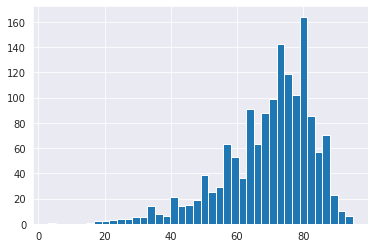

In [146]:
df_Action_user_score.hist(bins=40)

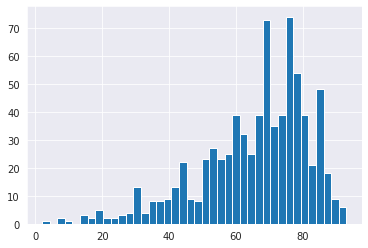

In [147]:
df_Sports_user_score.hist(bins=40)

In [148]:
scipy.stats.shapiro(df_Action_user_score)

(0.93326735496521, 2.879040811279479e-25)

In [149]:
scipy.stats.shapiro(df_Sports_user_score)

(0.9349104762077332, 8.638262026142294e-18)

In [150]:
scipy.stats.mannwhitneyu(df_Action_user_score, df_Sports_user_score, alternative='two-sided')

MannwhitneyuResult(statistic=649029.0, pvalue=1.1753329813658468e-07)

In [151]:
scipy.stats.mannwhitneyu(df_Action_user_score, df_Sports_user_score, alternative='two-sided').pvalue > alpha

False

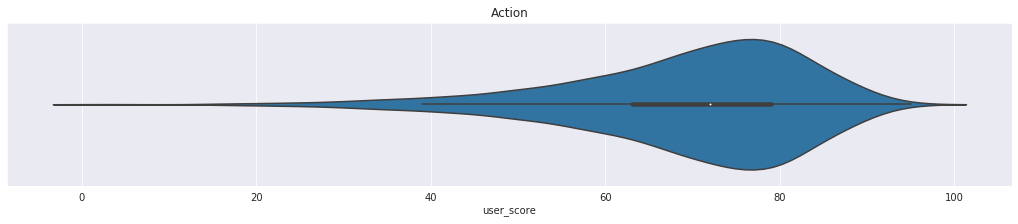

In [152]:
df_Action_user_score = df_Action_user_score.astype('float64')
sns.set_style('darkgrid')
plt.figure(figsize=(18, 3));
sns.violinplot(df_Action_user_score);
plt.title('Action');

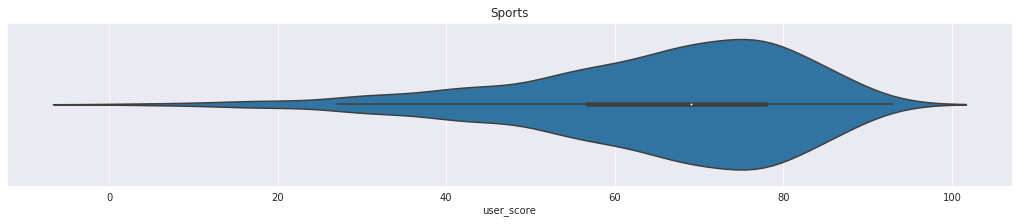

In [153]:
df_Sports_user_score = df_Sports_user_score.astype('float64')
sns.set_style('darkgrid')
plt.figure(figsize=(18, 3));
sns.violinplot(df_Sports_user_score);
plt.title('Sports');

Вероятность наступления нашей нулевой гипотезы слишком мала, поэтому мы не можем её принять и считаем, что:  
**Средние пользовательские рейтинги жанров Action и Sports разные**  
И уже как мы видим из описания и графиков, средние рейтинги по жанру Action выше

## Общий вывод

Обработав пропуски и подготовив данные я провел анализ и пришел к следующим выводам.  
Активный рост продаж игр начался с 1995, мировой пик пришелся на 2010 год. Сейчас же наблюдается спад. По началу было много разных платформ, но сейчас их количество уменьшилось. В среднем платформы существуют около 10 лет.   
Оценка критиков важна и влияет на продажи, в то время как оценка пользователей не очень, хотя казалось бы… Можно выделить рейтинг М из классификации ESRB, как самый продаваемый. Жанры тоже влияют на продажу и в общем я выделил экшены, шутеры и спорт. Однако посмотрев распределение по регионам я уже увидел специфику предпочтений и вкусов по платформам и жанрам для Америки, Европы и Японии (подробнее в соответствующем в разделе).   
По графикам роста продаж я пришел к выводу, что Play Station 4 и Xbox One X самые перспективные платформы на будущий год. 
Из актуальных платформ самые крупные по продажам Play Station 3 и 4 и Xbox 360.
В среднем для топовых платформ годовые продажи на игру составляют порядка 0,25 млн проданных копий и редко выходят за 0,75 млн проданных копий в год.  
Проверил гипотезы и пришел к выводу что средние пользовательские рейтинги платформ Xbox One и PC и жанров Action и Sports нельзя считать одинаковыми.   
*P.S. Для меня лично было интересным узнать, что ПК так сильно отстаёт от других платформ… Видимо из-за того, что у самого никогда приставок никаких не было, я думал, что ПК это безусловный лидер в игровой индустрии :)*